In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
original_image=cv2.imread('F:/dip/C.jpg')
# cv2.imshow('Image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
print(vectorized)


[[252. 255. 249.]
 [255. 255. 250.]
 [255. 255. 255.]
 ...
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]]


In [6]:
data=pd.DataFrame(vectorized,columns=['R','G','B'])
print(data)
k=2

           R      G      B
0      252.0  255.0  249.0
1      255.0  255.0  250.0
2      255.0  255.0  255.0
3      255.0  255.0  255.0
4      255.0  254.0  254.0
...      ...    ...    ...
63443  255.0  255.0  255.0
63444  255.0  255.0  255.0
63445  255.0  255.0  255.0
63446  255.0  255.0  255.0
63447  255.0  255.0  255.0

[63448 rows x 3 columns]


In [7]:
import math
import random
import pandas as pd
import random
import numpy as np
def k_mean(data,k):
    iters=0
    q=1
    r_mean=data.sample(k)
    while q>0:
        ind=r_mean.index.tolist()
        indx=data.index.tolist()
        col=data.columns.tolist()
        dist=pd.DataFrame()
        for i in range (k):
            distance=(data[col] - np.array(r_mean.loc[ind[i]])).pow(2).sum(1).pow(0.5)
            v=i+1
            v=str(v)          
            dist['d'+v]=distance
        col_dist=dist.columns.tolist()
        #--------------------------------------------------------------------------------------------------
        var=pd.DataFrame(dist.idxmin(axis=1),columns=['class'])
        u_mean=[]
        col.append('class')
        new_data=pd.DataFrame(columns=col)
        for i in range(k):
            index1=(var[var['class']==col_dist[i]]).index.tolist()
            cluster=data.loc[data.index.isin(index1)]
            m=cluster.mean().tolist()
            u_mean.append(m)
            l=len(cluster)
            list1=[]
            for j in range (l):
                list1.append(i+1)
            cluster['class']=list1
            new_data=new_data.append(cluster)
        col.remove(col[-1])
        u_mean=pd.DataFrame(u_mean,columns=col,index=ind)
        if u_mean.equals(r_mean):
            q=0
        else:
            r_mean=u_mean    
                
        res=new_data.reindex(indx)
        iters=iters+1
        label=res['class'].tolist()
        temp1=set(label)
        temp1=list(temp1)
        var3=0
        for i in range (k):
            for j in range (len(label)):
                var2=label[j]
                if var2==temp1[i]:
                    label[j]=var3
            var3=var3+1
    return new_data,u_mean,res,iters,label
[x,y,z,a,b]=k_mean(data,k)
print(y)


c:\users\ankit\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                R           G           B
3663   195.766418  202.364410  198.562744
12170   97.108917   92.215088   94.850319


(Text(0.5, 1.0, 'image for k=2'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

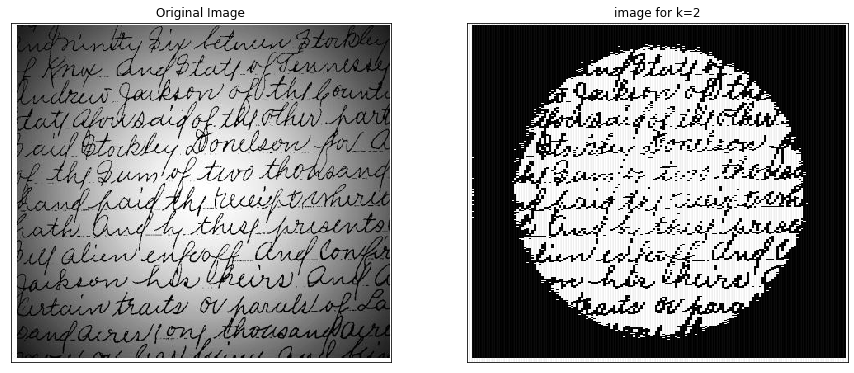

In [8]:
m=y.index.tolist()
n=x.index.tolist()
o=z.index.tolist()
#print(m)
#print(n)
list_=[]
for i in range (len(m)):
    h1=(y.loc[m[i]]).tolist()
    h2=x[x['class']==i+1]
    l1=len(h2)
    for j in range (l1):
        list_.append(h1)
        
    
res1=pd.DataFrame(list_,columns=['R','G','B'],index=n)
res1=res1.reindex(o)
list_1=[]
for g in range (len(res1)):
    h3=(res1.loc[g]).tolist()
    list_1.append(h3)

listx=np.array(list_1)
listx=np.uint8(listx)
result_image = listx.reshape((img.shape))
#print(result_image)
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image,cmap='gray')
h5=str(k)
plt.title('image for k='+h5), plt.xticks([]), plt.yticks([])
#plt.show()